# Библиотека numpy для работы с массивами чисел

Основной тип данных, который даёт нам библиотека — это массив чисел, причем он может иметь размерности от 0 и больше. С этими массивами можно эффективно производить разные операции, в частности арифметические, причем многие операции работают одновременно для всех элементов, поэтому библиотека позволяет не писать избегать циклов.

Библиотеку нужно установить, она называется numpy

In [1]:
import numpy as np

# 
a = np.array([10, 20, 30, 40])
b = np.array([2, 4, 6, 8])

print(a)
# арифметические операции с массивами действуют поэлементно
c = a + b
print(c)
print(a * b)

# есть математические операции, которые тоже действуют поэлементно:
a = np.array([10, 100, 1000, 1_000_000])
b = np.log10(a)
print(b)
# обычный логарифм не сработает, он ничего про numpy не знает:
#import math
#b = math.log(a)  # рабоает только для отдельных чисел

[10 20 30 40]
[12 24 36 48]
[ 20  80 180 320]
[1. 2. 3. 6.]


In [2]:
# можно создавать массивы двумерные
a = np.array([[10, 20], [30, 40]])
print(a)
b = np.array([[1, 2], [3, 4]])
print(a + b)

# есть стандартные матричные операции
c = a.transpose()  # транспонирование
print(c)
print(c * c)  # поэлементное умножение

print("-------------")
a = np.array([[1, 0], [0, 1]])
b = np.array([[1, 2], [3, 4]])
print(a)
print(b)
print(np.matmul(a, b))  # умножение как матриц
print(a * b)

[[10 20]
 [30 40]]
[[11 22]
 [33 44]]
[[10 30]
 [20 40]]
[[ 100  900]
 [ 400 1600]]
-------------
[[1 0]
 [0 1]]
[[1 2]
 [3 4]]
[[1 2]
 [3 4]]
[[1 0]
 [0 4]]


Индексирование элементов массива, т.е. доступ к содержимому. Возможно доставать из массива отдельные числа, а можно доставать подмассивы. В качестве индексов могут использоваться числа, слайсы, перечисления (списки) индексов:

In [3]:
a = np.array([10, 20, 30, 40, 50, 60, 70, 80])
print(a[0])
print(a[4])
print(a[0:4])  # это тоже numpy массив
print(a[::-1])  # см. прошлый семестр, с конца в начало, шаг -1
indices = [0, 3, 4, 7]
print(a[indices])
# аналогично, но не заводя отдельную переменную:
print(a[[0, 3, 4, 7]])

10
50
[10 20 30 40]
[80 70 60 50 40 30 20 10]
[10 40 50 80]
[10 40 50 80]


In [4]:
a = np.array([[10, 20, 30, 40], [50, 60, 70, 80], [90, 100, 110, 120]])
print(a)

print(a[1, 2])  # 2 строка, 3 столбец
print(a[0:2, 2]) # первые две строки, третий столбец
print(a[:, 2])  # 3 столбец, строки — от начала до конца
print(a[:, [2]])  # строки — от начала до конца, столбцы — только второй
print(a[ [0,1] , [0,1] ])  # Составляем список из элемента [0,0] и элемента [1,1]
print(a[0:2,0:2])  # квадратик два на два из левого верхнего угла

[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]]
70
[30 70]
[ 30  70 110]
[[ 30]
 [ 70]
 [110]]
[10 60]
[[10 20]
 [50 60]]


Операции сравнения и логические операции. Они тоже работают поэлементно. В результаты этих операций получаются массивы не из чисел, а из логических значений.

In [5]:
a = np.array([10, 20, 30, 40])
b = np.array([20, 0, 50, 10])

print(a > b)
print(a == b)

# можно применять операции к одному числу, пояснения позже
print(a >= 20)  # каждый элемент сравнивается с 20
print(a <= 30)
print(np.logical_and(a >= 20, a <= 30)) # and тоже работает поэлементно
# print(20 <= a <= 30)  # не работает 

# итого, мы выделили элементы, которые находятся в диапазоне от 20 до 30

[False  True False  True]
[False False False False]
[False  True  True  True]
[ True  True  True False]
[False  True  True False]


Логические массивы можно использовать как индексы, в этом случае выбираются только те элементы, для которых в индексе True

In [6]:
a = np.array([10, 20, 30, 40, 50, 60])
b = np.array([True, False, False, True, True, False])

print(a[b]) # элементы 0, 3, 4

indices = a >= 30  # [False False True True True True]
print(a[indices])  # выбраны элементы, которые больше или равны 30
# без отдельной переменной:
print(a[a >= 30])

[10 40 50]
[30 40 50 60]
[30 40 50 60]


Выделив подмассив, мы можем присвоить значения его элементам:

In [7]:
a = np.array([10, 20, 30, 40, 50, 60])
a[0] = 11
print(a)
a[1:3] = [21, 31] # индексам 1 и 2 присваиваем значения
print(a)
a[1:3] = a[1:3] * 2  # увеличить в два раза
print(a)

a[a >= 50] += 100  # добавить 100 к элементам, которые хотя бы 50
print(a)

[11 20 30 40 50 60]
[11 21 31 40 50 60]
[11 42 62 40 50 60]
[ 11  42 162  40 150 160]


Матрицы можно создавать с помощью вспомогательных функций:

In [8]:
a = np.zeros(10)
print(a)
a = np.zeros((3, 7))  # указываем в tuple размерности матрицы
print(a)

a = np.ones((4, 4))
print(a)

# при создании матрицы можно указывать тип элементов:
a = np.ones((4, 5), dtype=np.int32)  # int32 — это 32битные (4 байтовые числа, от -2млрд до +2млрд)
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


Что если размерности матриц при поэлементных операциях не согласованы:

In [9]:
# np.array([10, 20, 30]) + np.array([20, 30, 40, 50, 60, 70, 80])
np.array([10]) + np.array([20, 30, 40, 50, 60, 70, 80]) # или просто 10 + 

Если размерности при операции не соглаваны, то 1) одна из длин = 1, то она повторяется, чтобы соответствовать длине второго 2) иначе ошибка

In [10]:
a = np.array([[10, 20, 30], [40, 50, 60]])
b = np.array([[1, 2, 3]])

print(a + b)  # строк разное количество, но в b одна строка, она повторяется

b = np.array([1, 2, 3])
print(a + b)  # b - массив одномерный, он повторился и сложился с каждой строкой

b = np.array([[1], [2]])  # столбик из двух чисел
print(a + b)  # в a 3 столбика, поэтому столбик b повторяется 3 раза

# что если сложить столбик со строкой

a = np.array([[10, 20, 30, 40]])  # строка
b = np.array([[1, 2, 3]]).transpose()  # превращаю строку в столбец
print("----------")
print(a)
print(b)
print(a + b)  # каждый столбец повторился 4 раза, каждая строка повторилась 3 раза

[[11 22 33]
 [41 52 63]]
[[11 22 33]
 [41 52 63]]
[[11 21 31]
 [42 52 62]]
----------
[[10 20 30 40]]
[[1]
 [2]
 [3]]
[[11 21 31 41]
 [12 22 32 42]
 [13 23 33 43]]


Как рисовать графики из чисел?
Мы можем пользоваться библиотекой matplotlib. При рисовании графика указывается список x-координат точек, и список y-координат точек. Т.е. чтобы нарисовать точки (2, 5), (3, 4), (0, 2), надо указать `[2, 3, 0]` и `[5, 4, 2]`

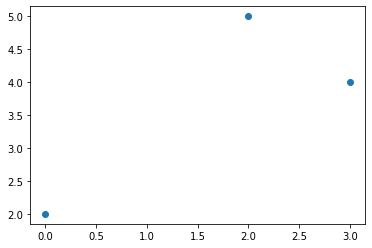

In [11]:
from matplotlib import pyplot as pp

pp.plot([2, 3, 0], [5, 4, 2], 'o')  # 'o' рисовать кружок в каждой точке

Если вместо 'o' указать '*', то будут рисоваться звездочки. Если вместо 'o' указать '-' или ничего не указывать, то точки соединяются линиями:

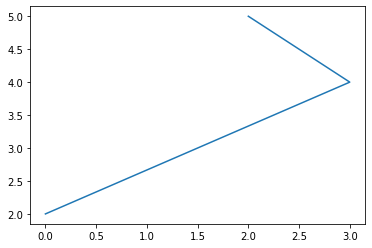

In [12]:
pp.plot([2, 3, 0], [5, 4, 2])

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
[ 0.54402111 -0.98935825  0.2794155   0.7568025  -0.90929743  0.
  0.90929743 -0.7568025  -0.2794155   0.98935825 -0.54402111]


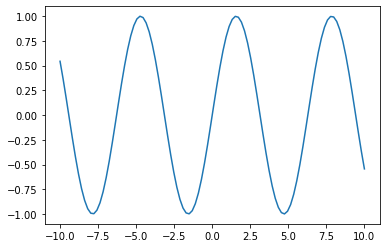

In [13]:
# Нарисуем график функции y = sin(x)

x = np.linspace(-10, 10, num=11)  # массив из чисел от -10 до 10, 11 штук
print(x)
y = np.sin(x)  # взять sin от каждой точки
print(y)


x = np.linspace(-10, 10, num=100)
y = np.sin(x) 

pp.plot(x, y)